# О возникновении силы тяги в системе вращающихся зарядов

In [1]:
%%cython
cdef extern from "lw_rotate.c":
    # расчет итерациями запаздывающего момента
    double tlag(long double x, long double y, long double z, long double t, 
                long double (*Coordinate)(long double t_zap,
                                     long double xc, long double yc, long double zc,
                                     long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap,
                                     long double xc, long double yc, long double zc,
                                     long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap,
                                     long double xc, long double yc, long double zc,
                                     long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap,
                                   long double xc, long double yc, long double zc,
                                   long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap,
                                   long double xc, long double yc, long double zc,
                                   long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap,
                                   long double xc, long double yc, long double zc,
                                   long double R, long double omega, long double alpha),
                long double xc, long double yc, long double zc,
                long double R, long double omega, long double alpha)
    
    long double tlag_test(long double x, long double y, long double z, long double t1, long double t2, 
                     long double (*Coordinate)(long double t_zap,
                                          long double xc, long double yc, long double zc,
                                          long double R, long double omega, long double alpha),
                     long double (*Coordinate)(long double t_zap,
                                          long double xc, long double yc, long double zc,
                                          long double R, long double omega, long double alpha),
                     long double (*Coordinate)(long double t_zap,
                                          long double xc, long double yc, long double zc,
                                          long double R, long double omega, long double alpha),
               long double xc, long double yc, long double zc,
               long double R, long double omega, long double alpha)

    # отношение радиуса Лиенара Вихерта к радиусу
    long double klw(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double xc, long double yc, long double zc, long double R, long double omega, long double alpha)
    # Радиус Лиенара Вихерта
    long double Rlw(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double xc, long double yc, long double zc, long double R, long double omega, long double alpha)
    
    
    # phi_lw - скалярный потенциал Лиенара Вихерта
    long double philw(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double q,
                long double xc, long double yc, long double zc, long double R, long double omega, long double alpha)


    # A_lw - векторный потенциал Лиенара Вихерта
    void Alw(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
             long double q,
             long double * A_x, long double * A_y, long double * A_z,
             long double xc, long double yc, long double zc, long double R, long double omega, long double alpha
           )
    
    void electr_magnet(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Coordinate)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Velocity)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Acceleration)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Acceleration)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double (*Acceleration)(long double t_zap, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha),
                long double q,
                long double * E_x, long double * E_y, long double * E_z, long double * B_x, long double * B_y, long double * B_z,
                       long double xc, long double yc, long double zc, long double R, long double omega, long double alpha)

    void cset_c(long double _c)
    void cset_timespan_Epsilon(long double _eps)
    void cset_max_steps(int _max_steps)
    long double cget_c()
    long double cget_timespan_Epsilon()

cdef extern from "lw_vimanic.c":
    long double sx(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);

    long double sy(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);

    long double sz(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);

    long double vx(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);

    long double vy(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);

    long double vz(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);

    long double wx(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);
    long double wy(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);
    long double wz(long double t, long double xc, long double yc, long double zc, long double R, long double omega, long double alpha);

    long double ccalc_sum_Fy_t(int N, long double t_i,
                      long double alpha0_l,
                      long double alpha0_r, int to_log);

    long double ccalc_Maxwells_stress_tensor(long double X_a, long double Y_a, long double Z_a, long double t_i,
                                     int N,
                                    long double cos_nx, long double cos_ny, long double cos_nz,
                                    long double alpha0_l,
                                    long double alpha0_r
                                   );

    long double spherical_ccalc_Maxwells_stress_tensor(
        long double r, long double theta, long double varphi, long double t)
    
    void cset_vc(long double vc)
    long double cget_omega()
    
    long double cget_S();
    long double cget_R_l();
    long double cget_R_r();

    long double cget_xc_l();
    long double cget_xc_r();

    long double cget_yc_l();
    long double cget_yc_r();

    long double cget_zc_l();
    long double cget_zc_r();
    

def calc_sum_Fy_t(N, t,
                  alpha0_l = 0,
                  alpha0_r = 0,
                  to_log = False):
    
    cdef int n = N
    cdef long double t_i = t

    cdef long double Alpha0_l = alpha0_l
    cdef long double Alpha0_r = alpha0_r
    cdef int To_log = to_log
    
    cdef long double Fy = ccalc_sum_Fy_t(n, t_i, Alpha0_l, Alpha0_r, To_log);

    return Fy

# Интегрируем в сферической системе координат,
# у которой однако в соотвествие с принятыми в задаче
# наименованиями осей главная ось игрек вместо зет
def spherical_calc_Maxwells_stress_tensor (r, theta, varphi, t) :
    cdef long double _r = r
    cdef long double _theta = theta
    cdef long double _varphi = varphi
    cdef long double _t = t
    
    return spherical_ccalc_Maxwells_stress_tensor(
        _r, _theta, _varphi, _t)

# направление векторов нормали к сферической воображаемой поверхности инвертировано - снаружи вовнутрь

def get_c():
    return cget_c()
def get_timespan_Epsilon():
    return cget_timespan_Epsilon()


def set_c(c):
    cset_c(c)
def set_timespan_Epsilon(eps):
    cset_timespan_Epsilon(eps)
def set_max_steps(_max_steps):
    cset_max_steps(_max_steps)
    
def set_vc(vc):
    cset_vc(vc)
    
def get_S():
    return cget_S()
def get_R_l():
    return cget_R_l()
def get_R_r():
    return cget_R_r()
    
def get_omega():
    return cget_omega()

In [2]:
import numpy as np
set_c(1.0)
set_timespan_Epsilon(1.e-15)
#v_c = np.float128(0.984)
set_vc(np.float128(0.8))
#v_c = np.float128(0.2)

In [3]:
# радиус сферы интегрирования
R = 4 * get_R_l() + 2 * get_S()
R *= 1.5
# R = 40 * get_R_l() + 20 * get_S()
R, R^2

(61.5000000000000, 3782.25000000000)

In [4]:
T = np.float128(2*pi)/get_omega() # период вращения
time_steps_number = 36000              # разбиваем период на шаги
dt = T / time_steps_number             # длительность шага

In [5]:
calc_sum_Fy_t(N = 1, t = T/3,
              alpha0_l = np.float128(0),
              alpha0_r = np.float128(0),
              to_log = True)

-0.00579436383218458

In [6]:
from scipy import integrate as scipy_integrate

# epsabs
# float or int, optional
# Absolute error tolerance.
# Default is 1.49e-8.
# quad tries to obtain an accuracy of abs(i-result) <= max(epsabs, epsrel*abs(i))
# where i = integral of func from a to b, and result is the numerical approximation. See epsrel below.

# epsrel
# float or int, optional
# Relative error tolerance.
# Default is 1.49e-8.
# If epsabs <= 0, epsrel must be greater than both 5e-29 and 50 * (machine epsilon). See epsabs above.

# limit
# float or int, optional
# An upper bound on the number of subintervals used in the adaptive algorithm.

#Returns:
# result
# float
# The result of the integration.

# abserr
# float
# The maximum of the estimates of the absolute error in the various integration results.

# out_dict
# dict, optional
# A dict containing additional information on the integration.



nquad_default_opts = \
           { 'epsabs' : 1.49e-08,
             'epsrel' : 1.49e-08,
             'limit'  : 50 }

nquad_opts_2 = { 'epsabs' : 1.0e-07,
                 'epsrel' : 1.0e-07,
                 'limit'  : 100 }

nquad_opts_3 = { 'epsabs' : 1.0e-01,
                 'epsrel' : 1.0e-03,
                 'limit'  : 100 }
 
#nquad_opts = { 'epsabs' : 1.49e-07,
#               'epsrel' : 1.49e-07,
#               'limit'  : 200 }

#nquad_opts = { 'epsabs' : 1.49e-08,
#               'epsrel' : 1.49e-08,
#               'limit'  : 100 }

In [7]:
t_fy = []
#t_f_alpha_l = []
#t_f_alpha_r = []
for i in range(0, time_steps_number):
    t_i = i * dt
    ans = calc_sum_Fy_t(N=1, t = t_i)
    #print(i, (i/steps_number).n(), t_i, ans)
    t_fy += [(i/time_steps_number, ans)]
    #t_f_alpha_l += [(i/time_steps_number, ans[1])]
    #t_f_alpha_r += [(i/time_steps_number, ans[2])]

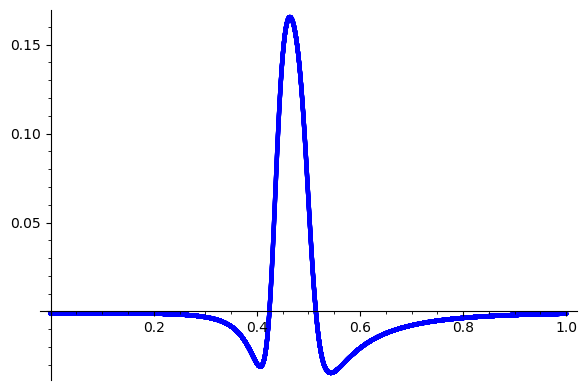

In [8]:
list_plot(t_fy)

In [9]:
#list_plot(t_f_alpha_l)

In [10]:
#list_plot(t_f_alpha_r)

In [11]:
# интегральная сумма компоненты силы по оси y, приложенной к зарядам, по периоду
sum_fy = 0
for (t_i, fy) in t_fy:
    sum_fy += fy * dt
sum_fy

0.1996899143605901822

In [12]:
# интегральная сумма компоненты силы по оси y, приложенной к зарядам, по периоду отнесённая к периоду
sum_fy / T

0.002542530956486814842

In [13]:
# интеграл компоненты силы по оси y, приложенной к зарядам, по периоду
ans = scipy_integrate.quad(lambda t : \
    calc_sum_Fy_t(N=1, t = t), 0, T)
ans
# (-8.721028191840928e-10, 3.5107927765742514e-09)

(0.19968991436057684, 4.825381532762334e-11)

In [14]:
# интеграл компоненты силы по оси y, приложенной к зарядам, по периоду отнесённая к периоду
ans[0] / T

0.002542530956486644993

Начинаем расчёт силы интегрального давления поля на воображаемый ящик сферической формы окружающий систему зарядов (пусть например "ящик" будет идеально поглощающим излучение).

для расчёта направляющих косинусов нормали к площадке интегрирования при интегрировании по поверхности сферы нам нужен

${\displaystyle {\boldsymbol {\hat {r}}}=\sin \theta \cos \varphi {\boldsymbol {\hat {\imath }}}+\sin \theta \sin \varphi {\boldsymbol {\hat {\jmath }}}+\cos \theta {\boldsymbol {\hat {k}}}}$

<p>ортогональный единичный вектор сферических координат в направлении увеличения ${\displaystyle r}$, а ${\displaystyle {\boldsymbol {\hat {\imath }}},{\boldsymbol {\hat {\jmath }}},{\boldsymbol {\hat {k}}}}$,
— единичные векторы декартовых координат.</p>

In [15]:
spherical_calc_Maxwells_stress_tensor(r=R, theta=pi/2, varphi=0, t=T/3)

-7.384836939112673e-10

In [16]:
spherical_calc_Maxwells_stress_tensor(r=R, theta=pi/2, varphi=0, t=T/4)

2.705229738791863e-09

In [17]:
spherical_calc_Maxwells_stress_tensor_R_t = lambda theta, varphi, t : \
     R^2 * spherical_calc_Maxwells_stress_tensor(r = R, theta = theta, varphi = varphi, t = t)

In [18]:
stress_tensor_upper_half_sphere_R_t = lambda t :  scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_calc_Maxwells_stress_tensor_R_t(theta = theta, varphi = varphi, t = t), \
        [ [0, pi/2],  [0, 2*pi]], opts=nquad_opts_2)
#          theta     varphi

In [19]:
stress_tensor_down_half_sphere_R_t = lambda t :  scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_calc_Maxwells_stress_tensor_R_t(theta = theta, varphi = varphi, t = t), \
        [ [pi/2, pi],  [0, 2*pi]], opts=nquad_opts_2)
#          theta     varphi

In [20]:
stress_tensor_R_t = lambda t :  scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_calc_Maxwells_stress_tensor_R_t(theta = theta, varphi = varphi, t = t), \
        [ [0, pi],  [0, 2*pi]], opts=nquad_opts_2)
#          theta     varphi

In [21]:
T = np.float128(2*pi)/get_omega() # период вращения
time_steps_number = 36000                # разбиваем период на шаги
dt = T / time_steps_number             # длительность шага

In [ ]:
t_py = []
t_py_up = []
t_py_dw = []
for i in range(0, time_steps_number):
    t_i = i * dt

    ans_dw = stress_tensor_down_half_sphere_R_t(t_i)
    print(i, (i/time_steps_number).n(), t_i, ans_dw)

    ans_up = stress_tensor_upper_half_sphere_R_t(t_i)
    print(i, (i/time_steps_number).n(), t_i, ans_up)

    print(i, (i/time_steps_number).n(), t_i, ans_up[0]+ans_dw[0])
    t_py_up += [(i/time_steps_number, ans_up[0])]
    t_py_dw += [(i/time_steps_number, ans_dw[0])]
    t_py += [(i/time_steps_number, ans_up[0]+ans_dw[0])]

0 0.000000000000000 0.0 (0.02658364472447905, 7.023088730149005e-08)
0 0.000000000000000 0.0 (-0.0025223515463535465, 2.394422666529019e-10)
0 0.000000000000000 0.0 0.024061293178125505
1 0.0000277777777777778 0.0021816615649929118407 (0.02657560277224945, 7.093025988930519e-08)
1 0.0000277777777777778 0.0021816615649929118407 (-0.002522661262054783, 2.4088277187262093e-10)
1 0.0000277777777777778 0.0021816615649929118407 0.024052941510194666
2 0.0000555555555555556 0.0043633231299858236814 (0.026567562845109173, 8.010215988597802e-08)
2 0.0000555555555555556 0.0043633231299858236814 (-0.002522971074692177, 2.423288216649806e-10)
2 0.0000555555555555556 0.0043633231299858236814 0.024044591770416995
3 0.0000833333333333333 0.006544984694978735522 (0.026559524942352832, 8.731103819797914e-08)
3 0.0000833333333333333 0.006544984694978735522 (-0.002523280984304023, 2.4378042486622865e-10)
3 0.0000833333333333333 0.006544984694978735522 0.02403624395804881
4 0.000111111111111111 0.008726646

In [ ]:
list_plot(t_py)

In [ ]:
# интегральная сумма количества импульса, вытекающего в единицу времени из объема воображаемой сферы по периоду
# она же
# интегральная сумма силы приложенной к поверхности воображаемой сферы по периоду
sum_py = 0
for (t_i, py) in t_py:
    sum_py += py * dt
sum_py

In [ ]:
# интегральная сумма силы приложенной к поверхности воображаемой сферы по периоду отнесённая к периоду
sum_py / T

In [ ]:
# интегральная сумма компоненты силы по оси y, приложенной к зарядам, по периоду отнесённая к периоду
sum_fy / T

In [ ]:
# интегральная сумма по периоду количества импульса,
# вытекающего в единицу времени из объема воображаемой сферы
# через верхнюю полусферу
# она же
# интегральная сумма силы приложенной к поверхности верхней воображаемой полусферы по периоду
sum_py_up = 0
for (t_i, py) in t_py_up:
    sum_py_up += py * dt
sum_py_up

In [ ]:
# интегральная сумма силы приложенной к поверхности верхней воображаемой полусферы по периоду отнесённая к периоду
sum_py_up / T

In [ ]:
# интегральная сумма по периоду количества импульса,
# вытекающего в единицу времени из объема воображаемой сферы
# через нижнюю полусферу
# она же
# интегральная сумма силы приложенной к поверхности нижней воображаемой полусферы по периоду
sum_py_dw = 0
for (t_i, py) in t_py_dw:
    sum_py_dw += py * dt
sum_py_dw

In [ ]:
# интегральная сумма силы приложенной к поверхности нижней воображаемой полусферы по периоду отнесённая к периоду
sum_py_dw / T

In [ ]:
spherical_calc_Maxwells_stress_tensor_R = lambda theta, varphi, t : \
     R^2 * spherical_calc_Maxwells_stress_tensor(r = R, theta = theta, varphi = varphi, t = t)

In [ ]:
# "upper\\,half\\,sphere"

Maxwells_stress_tensor_R_upper_half_sphere = scipy_integrate.nquad( \
    spherical_calc_Maxwells_stress_tensor_R, \
        [ [0, np.float128(pi)/2],  [0, np.float128(2*pi)],  [0, np.float128(2*pi)/get_omega()]], opts=nquad_opts_3)
#                theta                  varphi                   t

In [ ]:
Maxwells_stress_tensor_R_upper_half_sphere

In [ ]:
# "down\\,half\\,sphere"

Maxwells_stress_tensor_R_down_half_sphere = scipy_integrate.nquad( \
    spherical_calc_Maxwells_stress_tensor_R, \
        [ [np.float128(pi)/2, np.float128(pi)],  [0, np.float128(2*pi)],  [0, np.float128(2*pi)/get_omega_d()]], opts=nquad_opts)
#                theta                  varphi                   t

In [ ]:
Maxwells_stress_tensor_R_down_half_sphere

In [ ]:
Maxwells_stress_tensor_R_upper_half_sphere + Maxwells_stress_tensor_R_down_half_sphere

In [ ]:
Maxwells_stress_tensor_R = scipy_integrate.nquad( \
    spherical_calc_Maxwells_stress_tensor_R, \
        [ [0, np.float128(pi)],  [0, np.float128(2*pi)],  [0, np.float128(2*pi)/get_omega()]], opts=nquad_opts)
#                theta                  varphi                   t

In [ ]:
Maxwells_stress_tensor_R
# v_c = np.float128(0.984)
#         result                  abserr
# (-1.553907207973527e-07,  1.0236458948831668)   # 'epsabs' : 1.49e-03, 'epsrel' : 1.49e-03, 'limit'  : 50
# (-1.5539075127251786e-07, 0.009103807089559712) # 'epsabs' : 1.49e-05, 'epsrel' : 1.49e-05, 'limit'  : 200

# 'epsabs' : 1.49e-07, 'epsrel' : 1.49e-07, 'limit'  : 200
# IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
#  the requested tolerance from being achieved.  The error may be 
#  underestimated.

In [ ]:
calc_sum_Fy_t(N=1, S=S, R_l=R_l, R_r=R_r, t_i = 1)